# DEMONSTRATION: DETECTION TECHNIQUES
# Distance Metrics + Classification Models  

## One: Collecting Data

In [1]:
import numpy as np
import pandas as pd
whitedata = np.genfromtxt('winequality-white.csv',delimiter=',',names=True)
names = whitedata.dtype.names
brands = pd.read_csv('wine-brand.csv', header = 0)

In [2]:
df = pd.DataFrame(whitedata)
df['brand'] = brands
df.head(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,brand
0,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6,summer sparkling splashed reisling
1,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6,sparkling gloaming enchanted reisling
2,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6,penguin equinox leaping moscato
3,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6,golden moon splashed chardonnay
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6,oaky moon soaring semillon


In [5]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


## Two: Distributions + Correlations (Business Rules)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10a0d0c90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10d672b50>]], dtype=object)

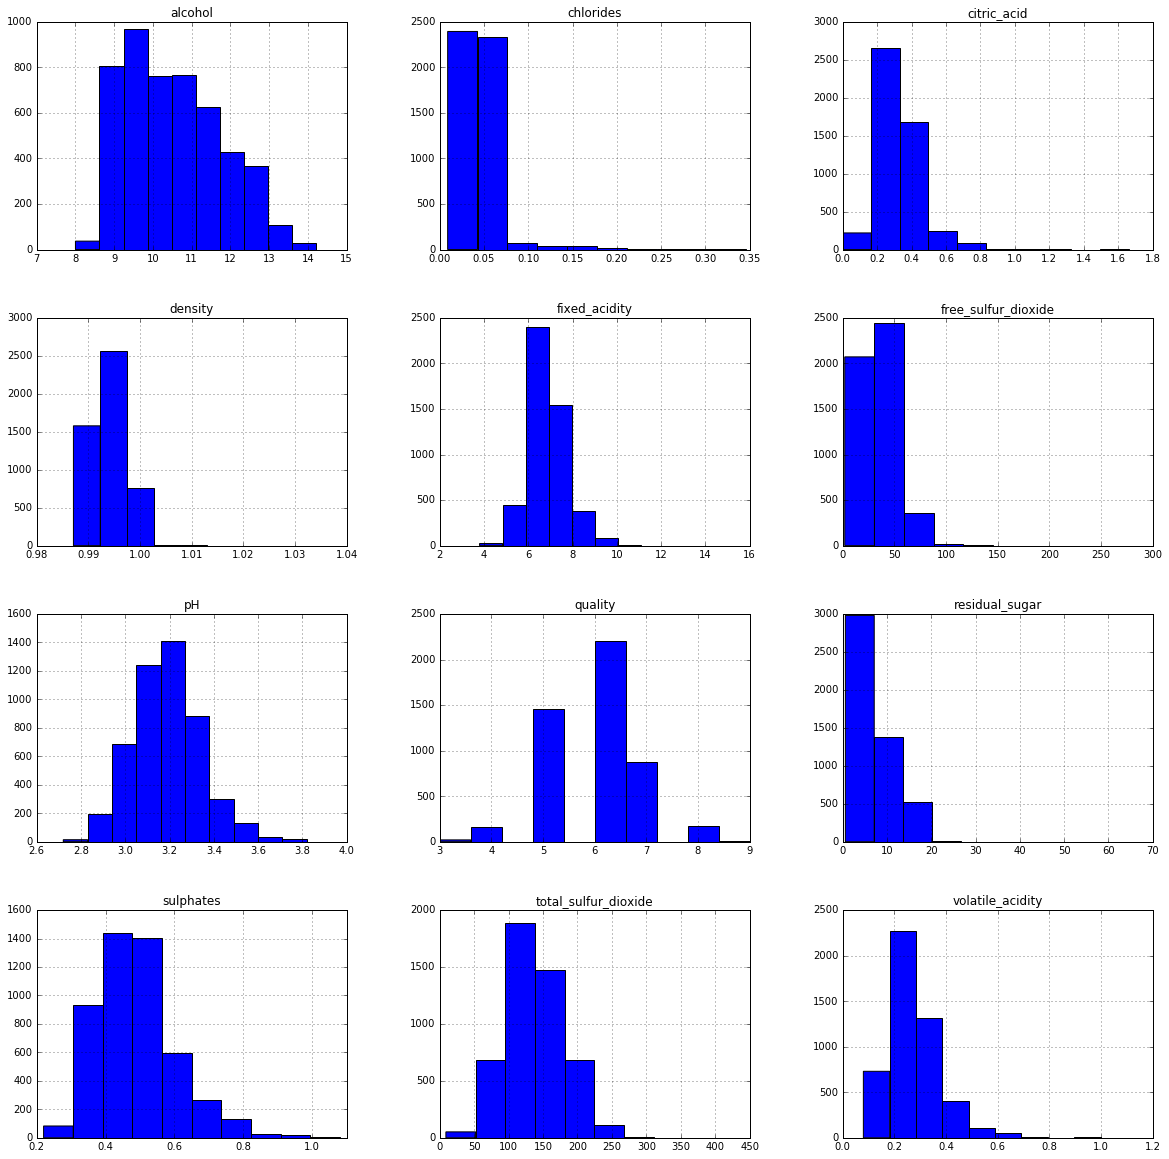

In [3]:
from matplotlib import pylab as pl
%matplotlib inline
df[df.columns[0:12]].hist(figsize=(20,20))

In [4]:
df[df['chlorides'] > 0.10].sort('chlorides', ascending=0).head(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,brand
484,6.2,0.37,0.30,6.6,0.346,79,200,0.99540,3.29,0.58,9.6,5,hidden spring enchanted reisling
1217,8.0,0.61,0.38,12.1,0.301,24,220,0.99930,2.94,0.48,9.2,5,fall mossy leaping reisling
687,6.8,0.67,0.30,13.0,0.290,22,193,0.99840,3.08,0.67,9.0,4,oaky honeybee splashed semillon
4473,7.1,0.36,0.20,1.6,0.271,24,140,0.99356,3.11,0.63,9.8,5,equinox honeybee enchanted reisling
1865,7.6,0.36,0.44,8.3,0.255,28,142,0.99580,3.12,0.43,10.2,6,gloaming golden leaping semillon


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f1c8050>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1128c0bd0>]], dtype=object)

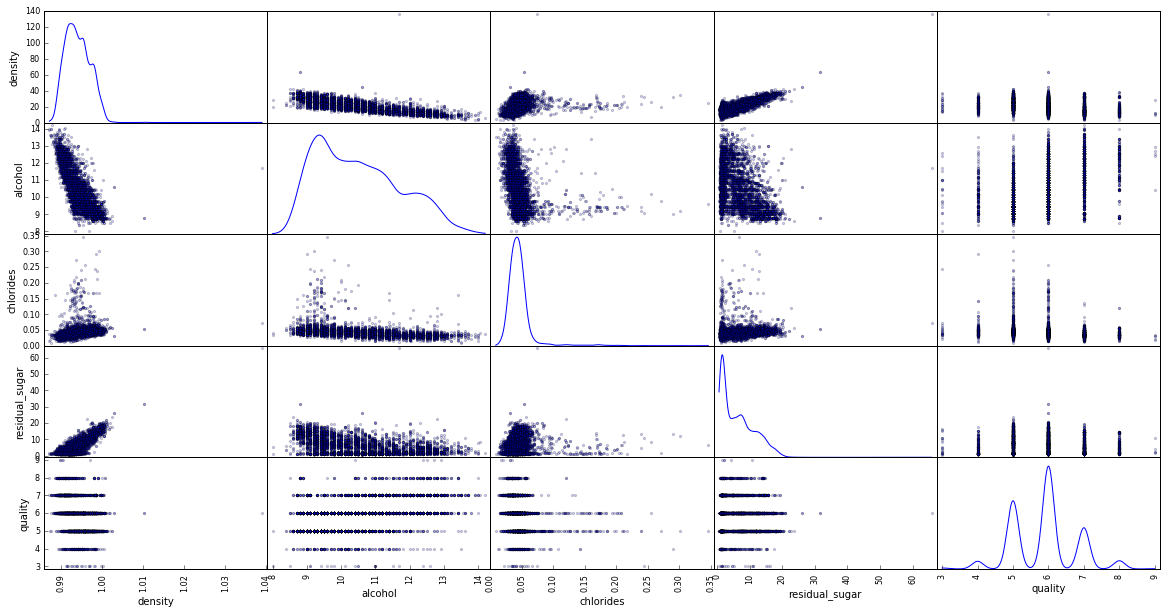

In [8]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df[['density','alcohol','chlorides','residual_sugar','quality']], alpha=0.2, figsize=(20, 10), diagonal='kde')

## Three: Nearest Neighbor + Dimensionality Reduction (Anamoly Detection)

In [5]:
pick = 98
df.iloc[pick]

fixed_acidity                                      9.8
volatile_acidity                                  0.36
citric_acid                                       0.46
residual_sugar                                    10.5
chlorides                                        0.038
free_sulfur_dioxide                                  4
total_sulfur_dioxide                                83
density                                         0.9956
pH                                                2.89
sulphates                                          0.3
alcohol                                           10.1
quality                                              4
brand                   hidden moon splashed semillon 
Name: 98, dtype: object

In [10]:
from sklearn import preprocessing as pre
Xdata = np.array([whitedata[name] for name in names]).transpose()
Xsca = pre.scale(Xdata)
print Xsca.shape
find = Xsca[pick,:]
print find.shape

(4898, 12)
(12,)


In [11]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
neighbors = NearestNeighbors(n_neighbors=5, algorithm='brute').fit(Xsca)
distances, indices = neighbors.kneighbors(find)

In [12]:
for i in range(len(indices[0])):
  print "%2f  %s" % (distances[0][i], df.brand[indices[0][i]])

0.000000  hidden moon splashed semillon 
1.466411  gloaming frog enchanted chardonnay 
2.343017  spring beguiling leaping sauvignon blanc 
2.379129  frog hidden enchanted pinot gris 
2.569685  honeybee spring enchanted chardonnay 


In [13]:
df.iloc[indices[0]]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,brand
98,9.8,0.36,0.46,10.50,0.038,4,83,0.9956,2.89,0.30,10.1,4,hidden moon splashed semillon
169,9.8,0.42,0.48,9.85,0.034,5,110,0.9958,2.87,0.29,10.0,5,gloaming frog enchanted chardonnay
2083,9.4,0.30,0.32,10.70,0.029,14,111,0.9958,2.85,0.42,10.6,5,spring beguiling leaping sauvignon blanc
1404,9.0,0.31,0.48,6.60,0.043,11,73,0.9938,2.90,0.38,11.6,5,frog hidden enchanted pinot gris
1349,9.2,0.35,0.39,0.90,0.042,15,61,0.9924,2.96,0.28,10.4,4,honeybee spring enchanted chardonnay


(4898, 3)


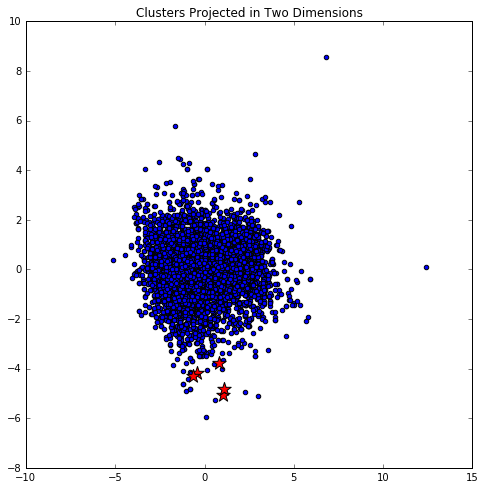

In [14]:
from sklearn.decomposition import TruncatedSVD
#from mpl_toolkits.mplot3d import Axes3D
svd = TruncatedSVD(n_components=3)
svd.fit(Xsca)
Xrot = svd.transform(Xsca)
print Xrot.shape
fig = pl.figure(figsize=(8,8))
pl.title('Clusters Projected in Two Dimensions')
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(Xrot[np.random.choice(,0],Xrot[:,1],Xrot[:,2])
#ax.scatter(Xrot[indices[0],0],Xrot[indices[0],1],Xrot[indices[0],2], c='r', marker='*', s=80)
pl.scatter(Xrot[:,0],Xrot[:,1])
pl.scatter(Xrot[indices[0],0],Xrot[indices[0],1], c='r', marker='*', s=200)
pl.show()

## Four: Classification (Predictive Models)

In [15]:
classlabel = np.genfromtxt('winequality-2classlabels-white.csv',delimiter=',',names=True)
classlabel.shape

(4898,)

In [61]:
ldf = df
ldf['yuck'] = pd.DataFrame(classlabel)
ldf.yuck = ldf.yuck.apply(lambda x:int(x))
print ldf.yuck.describe()

count    4898.000000
mean        0.334831
std         0.471979
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: yuck, dtype: float64
label count  1640


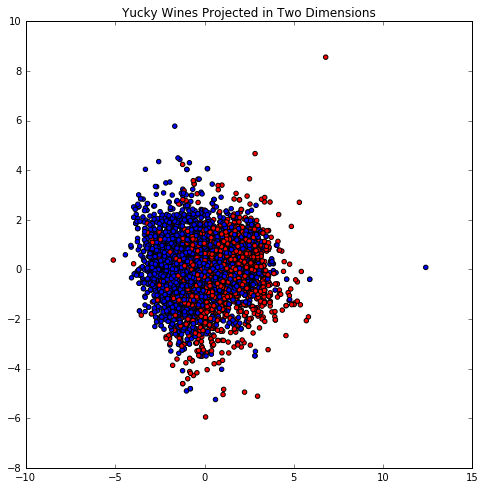

In [17]:
colors = ['blue','red']
fig = pl.figure(figsize=(8,8))
pl.title('Yucky Wines Projected in Two Dimensions')
pl.scatter(Xrot[:,0],Xrot[:,1], c=ldf.yuck.apply(lambda x:colors[x]))
pl.show()


In [64]:
from sklearn import cross_validation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(Xdata, classlabel, test_size=0.3, random_state=0)
print 'Total wines in test set: ', len(y_test)
print 'Yucky wines in test set: ', sum([int(x[0]) for x in y_test.tolist()])

Total wines in test set:  1470
Yucky wines in test set:  527


In [53]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=pl.cm.Blues):
    pl.imshow(cm, interpolation='nearest', cmap=cmap)
    pl.title(title)
    pl.colorbar()
    tick_marks = np.arange(2)
    pl.xticks(tick_marks, ['yum','yuck'], rotation=45)
    pl.yticks(tick_marks, ['yum','yuck'])
    pl.tight_layout()
    pl.ylabel('True label')
    pl.xlabel('Predicted label')

In [73]:
from sklearn import svm
clf = svm.SVC( probability=True, random_state=0)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
probas_svm = clf.predict_proba(X_test)
print "Classification score: Support Vector Machine ", clf.score(X_test, y_test)

Classification score: Support Vector Machine  0.781632653061


[[878  65]
 [256 271]]


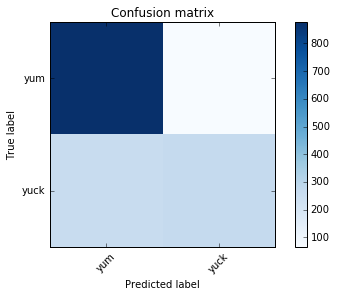

In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix([x[0] for x in y_test.tolist()], [x[0] for x in y_pred.tolist()])
print cm
pl.figure()
plot_confusion_matrix(cm)

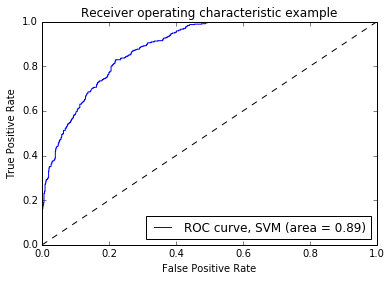

In [79]:
from sklearn.metrics import roc_curve, auc
pl.figure()
fpr, tpr, thresholds = roc_curve([x[0] for x in y_test.tolist()], probas_svm[:, 1])
roc_auc = auc(fpr,tpr)
pl.plot(fpr, tpr, label='ROC curve, SVM (area = %0.2f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'k--') # coin toss line
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic example')
pl.legend(loc="lower right")
pl.show()

In [70]:
from sklearn import linear_model
clf = linear_model.LogisticRegression()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
probas_log = clf.predict_proba(X_test)
print "Classification score, Logistic Regression ", clf.score(X_test, y_test)

Classification score, Logistic Regression  0.998639455782


[[941   2]
 [  0 527]]


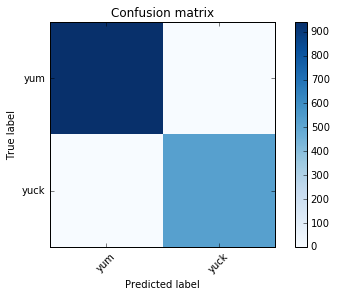

In [71]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix([x[0] for x in y_test.tolist()], [x[0] for x in y_pred.tolist()])
print cm
pl.figure()
plot_confusion_matrix(cm)

In [67]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
probas_tree = clf.predict_proba(X_test)
print "Classification score, Decision Tree ", clf.score(X_test, y_test)

Classification score, Decision Tree  1.0


[[943   0]
 [  0 527]]


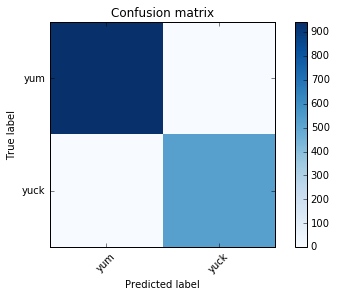

In [68]:
cm = confusion_matrix([x[0] for x in y_test.tolist()], [x[0] for x in y_pred.tolist()])
print cm
pl.figure()
plot_confusion_matrix(cm)

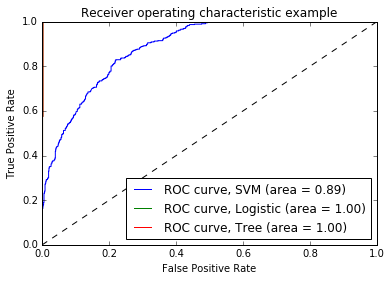

In [78]:
from sklearn.metrics import roc_curve, auc
pl.figure()
fpr, tpr, thresholds = roc_curve([x[0] for x in y_test.tolist()], probas_svm[:, 1])
roc_auc = auc(fpr,tpr)
pl.plot(fpr, tpr, label='ROC curve, SVM (area = %0.2f)' % roc_auc)
fpr, tpr, thresholds = roc_curve([x[0] for x in y_test.tolist()], probas_log[:, 1])
roc_auc = auc(fpr,tpr)
pl.plot(fpr, tpr, label='ROC curve, Logistic (area = %0.2f)' % roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, probas_tree[:, 1])
roc_auc = auc(fpr,tpr)
pl.plot(fpr, tpr, label='ROC curve, Tree (area = %0.2f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'k--') # coin toss line
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic example')
pl.legend(loc="lower right")
pl.show()

# PARKING LOT

In [23]:
from sklearn.externals.six import StringIO  
import pydot 
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png("wine.png") 

InvocationException: Program terminated with status: -5. stderr follows: dyld: Library not loaded: /usr/lib/libltdl.7.dylib
  Referenced from: /Users/ryantuggle/anaconda/bin/dot
  Reason: image not found


In [31]:
from sklearn.tree import export_graphviz
def visualize_tree(clf, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    clf -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        export_graphviz(clf, out_file=f,
                        feature_names=feature_names)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")

In [33]:
visualize_tree(clf, names)

In [23]:
from sklearn.externals.six import StringIO
with open("wine.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

In [24]:
import os
os.unlink('wine.dot')

In [88]:
cnt = 0
diff
for name in names:
    mean0, std0 = ldf[name][ldf.yuck == 0].describe()[1:3]
    mean1, std1 = ldf[name][ldf.yuck == 1].describe()[1:3]
    tstat, pval = stats.ttest_ind(ldf[name][ldf.yuck == 0], ldf[name][ldf.yuck == 1])
    
    print "%20s: -Good- mean=%.3f, dev=%.3f; -Yuck- mean=%.3f, dev=%.3f; tstat=%.3f, pval=%.3f" % (name,mean0,std0,mean1,std1,tstat,pval)

NameError: name 'diff' is not defined

In [47]:
Xrot[indices[0],0]

array([-0.23722848, -0.8377999 , -0.23902242, -0.18729963,  2.0574046 ])

In [ ]:
Xrot.shape

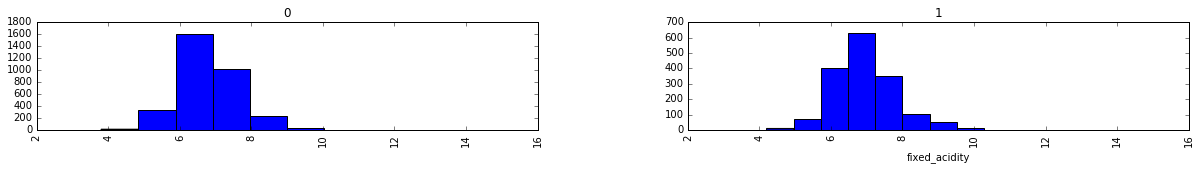

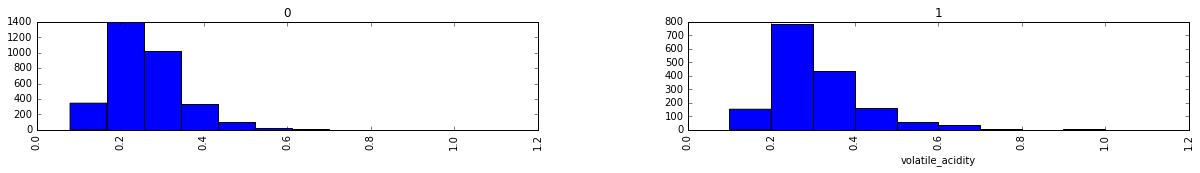

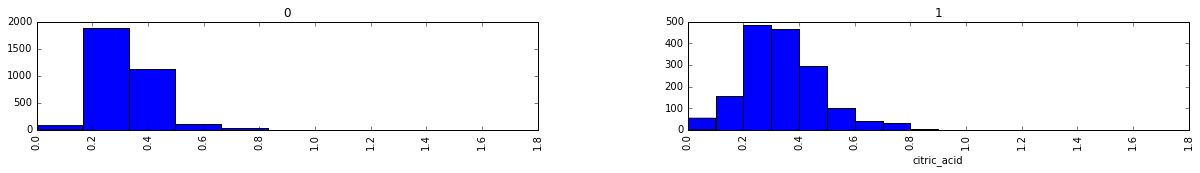

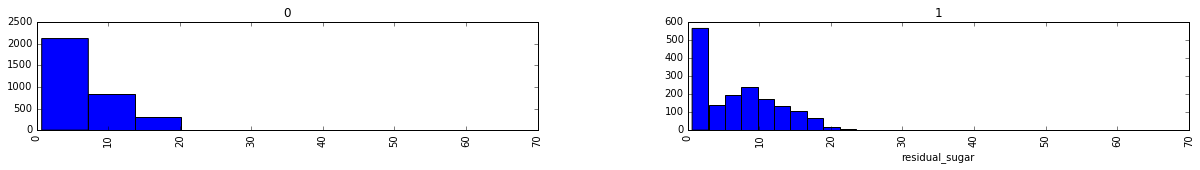

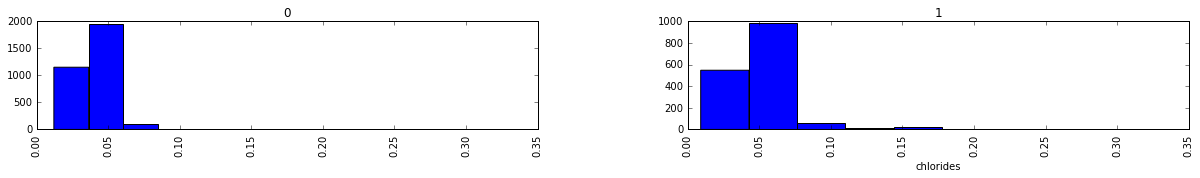

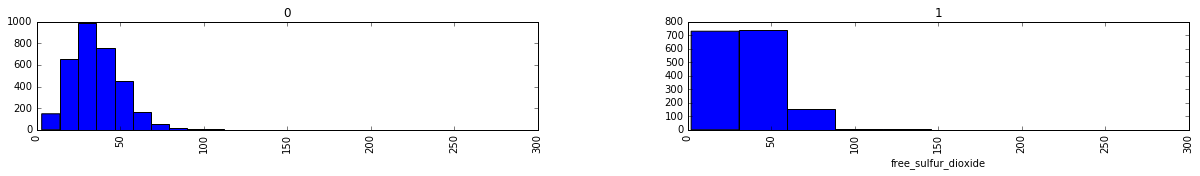

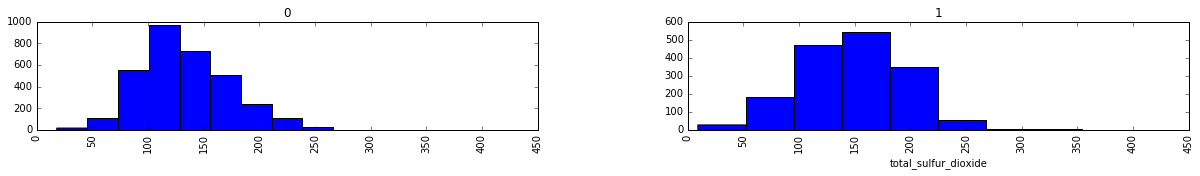

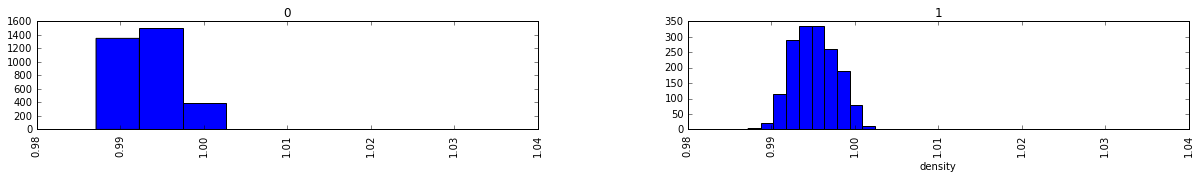

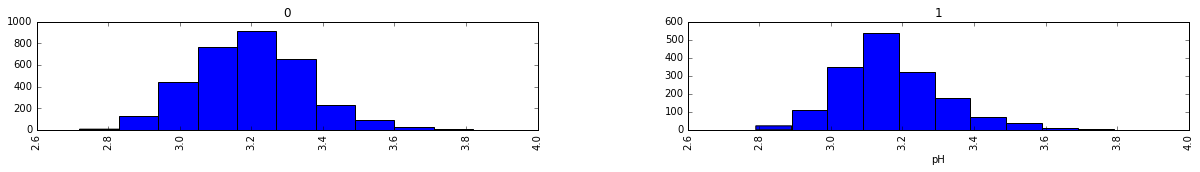

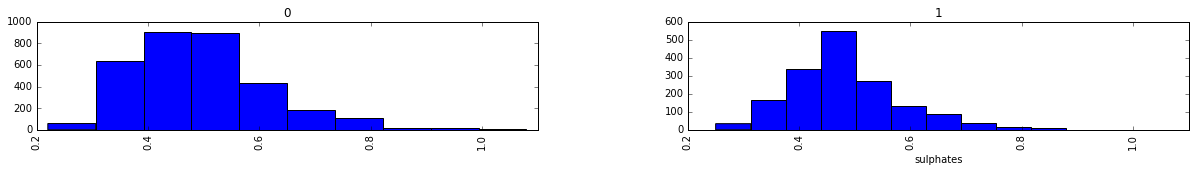

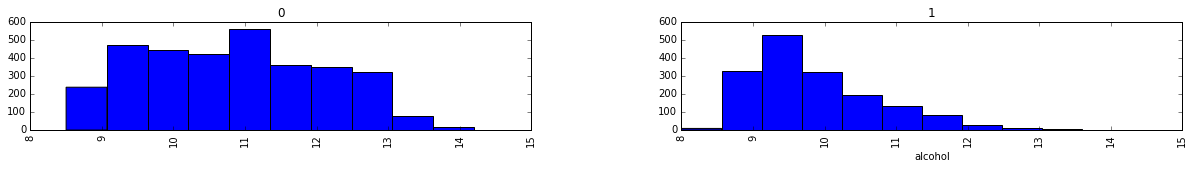

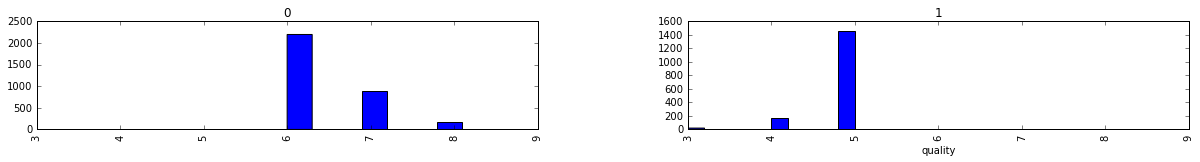

In [107]:
for name in names:
    ldf[name].hist(by=ldf.yuck, figsize=(20,2), bins=10, sharex=True); pl.xlabel(name)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x128d59a10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x128f9c050>]], dtype=object)

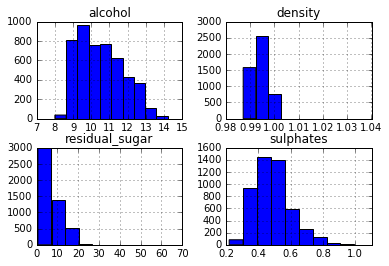

In [39]:
df[['residual_sugar','alcohol','density','sulphates']].hist()
#%matplotlib inline
#df[]

In [112]:
ldf.pH[ldf.yuck==0].describe()[1:3]

mean    3.197231
std     0.153517
Name: pH, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12be1dd50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x136f93810>]], dtype=object)

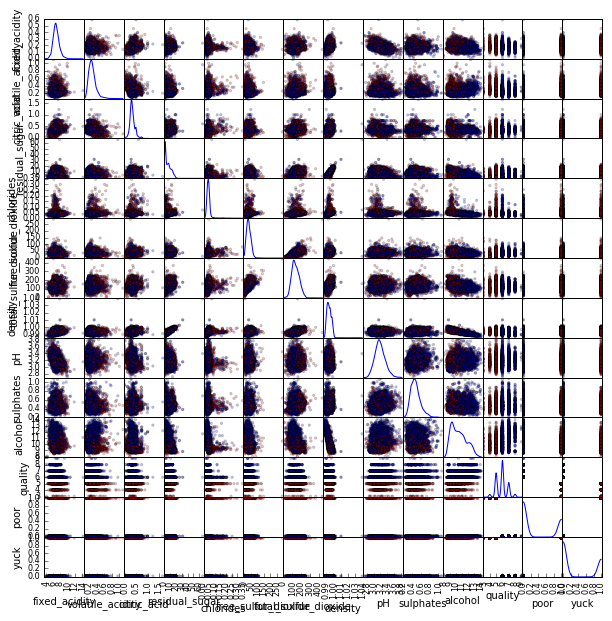

In [60]:
colors = ['blue','red']
scatter_matrix(ldf, alpha=0.2, figsize=(10, 10), diagonal='kde', c=ldf.yuck.apply(lambda x:colors[x]))

In [6]:
names = whitedata.dtype.names

In [58]:
colors = ['blue','red']
ldf.yuck.apply(lambda x:colors[x])

0     blue
1     blue
2     blue
3     blue
4     blue
5     blue
6     blue
7     blue
8     blue
9     blue
10     red
11     red
12     red
13    blue
14     red
...
4883    blue
4884     red
4885    blue
4886    blue
4887    blue
4888     red
4889    blue
4890    blue
4891    blue
4892     red
4893    blue
4894     red
4895    blue
4896    blue
4897    blue
Name: yuck, Length: 4898, dtype: object

In [9]:
names[110]

'residual_sugar'

In [13]:
np.arange(4)

array([0, 1, 2, 3])

In [17]:
names[1:3]

('volatile_acidity', 'citric_acid')